In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm

In [2]:
df=pd.read_csv('football_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Unnamed: 60'],
      dtype='object')

In [4]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'High/ Low',
       'Medium/ High', 'High/ Medium', 'High/ High', 'Low/ Medium',
       'Medium/ Medium', 'Akinfenwa', nan, 'Low/ High'], dtype=object)

In [5]:
df['Body Type']=df['Body Type'].astype(str)
df['Body Type']=df['Body Type'].str.replace('Messi','Normal')
df['Body Type']=df['Body Type'].str.replace('C. Ronaldo','Normal')
df['Body Type']=df['Body Type'].str.replace('Neymar','Normal')
df['Body Type']=df['Body Type'].str.replace('Courtois','Normal')
df['Body Type']=df['Body Type'].str.replace('PLAYER_BODY_TYPE_25','Normal')
df['Body Type']=df['Body Type'].str.replace('Shaqiri','Normal')
df['Body Type']=df['Body Type'].str.replace('Akinfenwa','Normal')
df['Body Type']=df['Body Type'].str.replace('nan','Normal')


/tmp/ipykernel_3428/2498928542.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Body Type']=df['Body Type'].str.replace('C. Ronaldo','Normal')


In [6]:
df.info()
df.fillna(0, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  object 
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  object 
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

In [7]:
df2 = df.drop(columns=['ID', 'Name', 'Nationality', 'Club','Value','Wage','Preferred Foot','Work Rate',
                       'Body Type','Real Face','Position','Release Clause', 'Joined', 'Loaned From','Contract Valid Until','Height',
                       'Weight','Special','International Reputation','Jersey Number','Crossing','Unnamed: 60','Unnamed: 0'])

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Overall          18207 non-null  int64  
 2   Potential        18207 non-null  int64  
 3   Weak Foot        18207 non-null  float64
 4   Skill Moves      18207 non-null  float64
 5   Finishing        18207 non-null  float64
 6   HeadingAccuracy  18207 non-null  float64
 7   ShortPassing     18207 non-null  float64
 8   Volleys          18207 non-null  float64
 9   Dribbling        18207 non-null  float64
 10  Curve            18207 non-null  float64
 11  FKAccuracy       18207 non-null  float64
 12  LongPassing      18207 non-null  float64
 13  BallControl      18207 non-null  float64
 14  Acceleration     18207 non-null  float64
 15  SprintSpeed      18207 non-null  float64
 16  Agility          18207 non-null  float64
 17  Reactions   

In [9]:
df2.head()

,Age,Overall,Potential,Weak Foot,Skill Moves,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,4.0,4.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,4.0,5.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,5.0,5.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,3.0,1.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,5.0,4.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [10]:
X = df2.values
# Using the standard scaler method to standardize all of the features by converting them into values between -3 and +3.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents1 = pca.fit_transform(X)
cols = list(df2.columns)
# get the index of the most important feature on EACH component i.e. largest absolute value
important_indices = [np.abs(component).argmax() for component in pca.components_]
# get the most important feature names
important_names = [cols[i] for i in important_indices]
important_names

['BallControl',
 'SlidingTackle',
 'Overall',
 'Balance',
 'Jumping',
 'Potential',
 'Weak Foot',
 'Jumping',
 'Strength',
 'FKAccuracy']

In [12]:
class K_Means:
    def __init__(self, k, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

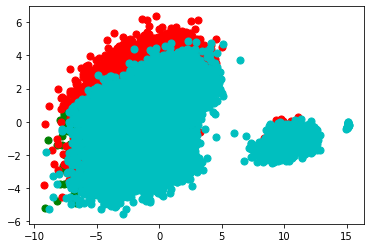

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
# y_kmeans = kmeans.fit_predict(principalComponents1)
# centers = 5
# # Fit centroids to dataset
colors = 10*["g","r","c","b","k"]
clf = K_Means(k=3)
clf.fit(principalComponents1)



for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=50, linewidths=1)
plt.show()
# plt.show(y_kmeans)
# plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')


472.3379182834272
432.0091447396141
697.1785722520582


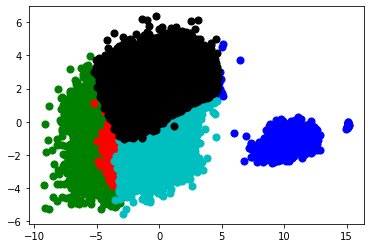

In [14]:
colors = 10*["g","r","c","b","k"]
clf = K_Means(k=5)
clf.fit(principalComponents1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=50, linewidths=1)
plt.show()



388.4891056792026


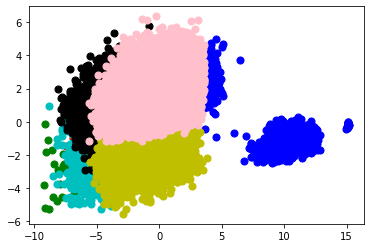

In [15]:
colors = 10*["g","r","c","b","k","y","pink"]
clf = K_Means(k=7)
clf.fit(principalComponents1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=50, linewidths=1)
plt.show()


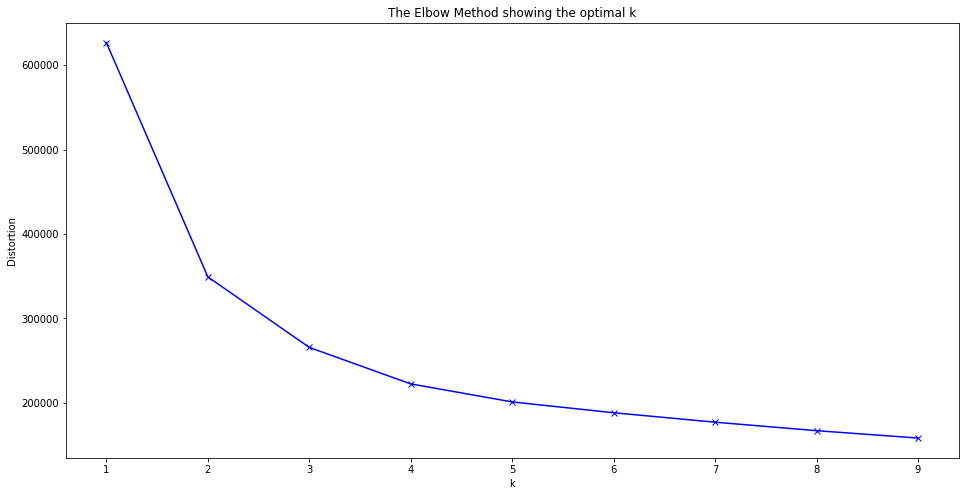

In [17]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalComponents1)
    distortions.append(kmeanModel.inertia_)
#     score = silhouette_score(X, kmeanModel.labels_, metric='euclidean')
#     print('Silhouetter Score: %.3f' % score)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
X=principalComponents1
range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5616744884221917
For n_clusters = 3 The average silhouette_score is : 0.27110718352978525
For n_clusters = 4 The average silhouette_score is : 0.26613811515215546
For n_clusters = 5 The average silhouette_score is : 0.24561882725063564
For n_clusters = 6 The average silhouette_score is : 0.22456258782849622
For n_clusters = 7 The average silhouette_score is : 0.2200471718716955


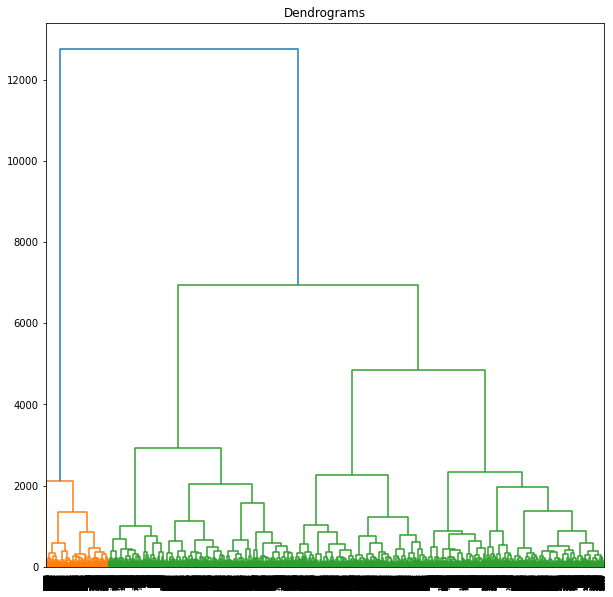

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df2, method='ward'))

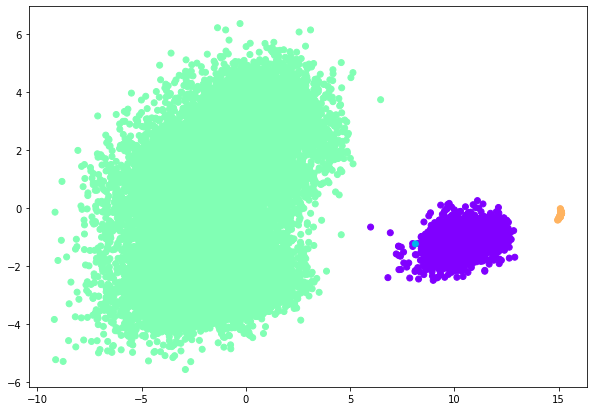

In [21]:
#perform agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
cluster.fit_predict(principalComponents1)
plt.figure(figsize=(10, 7))
plt.scatter(principalComponents1[:,0],principalComponents1[:,1], c=cluster.labels_, cmap='rainbow')

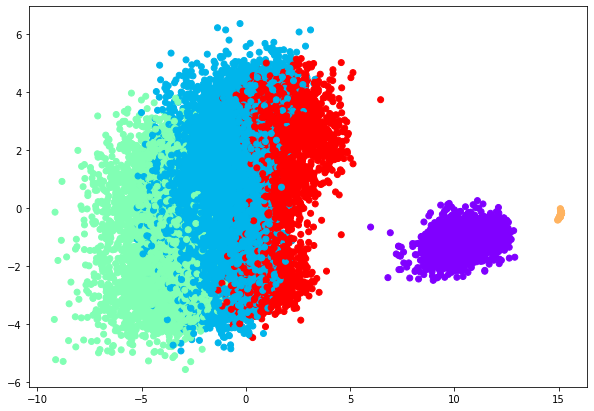

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit_predict(principalComponents1)
plt.figure(figsize=(10, 7))  
plt.scatter(principalComponents1[:,0],principalComponents1[:,1], c=cluster.labels_, cmap='rainbow')

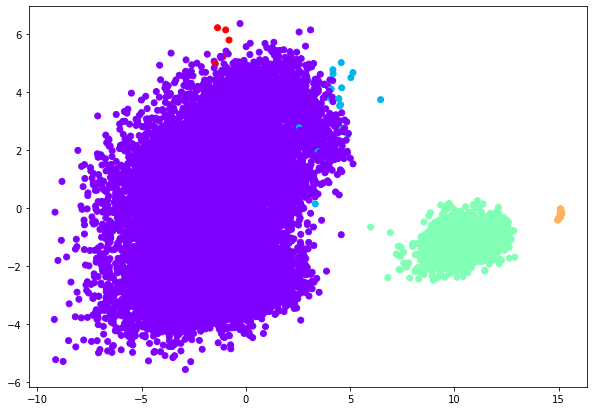

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
cluster.fit_predict(principalComponents1)
plt.figure(figsize=(10, 7))  
plt.scatter(principalComponents1[:,0],principalComponents1[:,1], c=cluster.labels_, cmap='rainbow')